<a href="https://www.kaggle.com/code/hoshimmardonov1/clustering-customer?scriptVersionId=125584764" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler

<h1>Customer clustering</h1>

<h4>Dataset</h4>

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h3>Data cleaning</h3>

**The Address** column is *text*. We cannot use this column for distance calculation, so we will **discard** this column.

In [3]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


<h3>Normalization</h3>
We normalize all columns except the **Customer Id** column.

In [4]:
X = df.values[:, 1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h3>Model</h3>

In [5]:
k = 3
k_means = KMeans(n_clusters = k)
k_means.fit(norm_data)
print(k_means.labels_)

[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 1 0 1 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 1 0 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 2 2 0 0 0 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 1 0 0 2 0 0 1 1 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 0 0 2 0
 2 0 0 0 0 0 1 2 2 0 1 0 

In [6]:
df['cluter'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluter
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can get information about clusters by finding the centroid of each cluster. For this, we use groupby and mean functions

In [7]:
df.groupby('cluter').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluter,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


What can be inferred about the customers in each cluster?

For example, if we look at **age**, cluster *0* is older youth (43+), cluster *1* is middle age (33+), cluster *2* is young (up to 31).

The columns that clearly **distinguish** each cluster are *Income* and *Year Employed*.

So we can define each cluster as:

* Cluster 0 - Young, less experienced and lower income customers.
* Cluster 1 - Older, long-term, high-income customers.
* Cluster 2 - Middle-aged, 7+ years of experience, low-income customers.

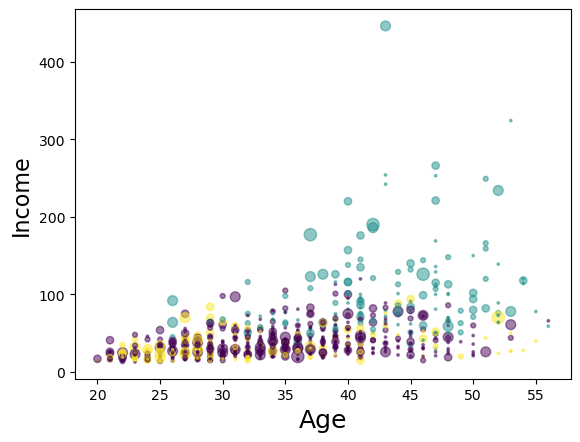

In [8]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


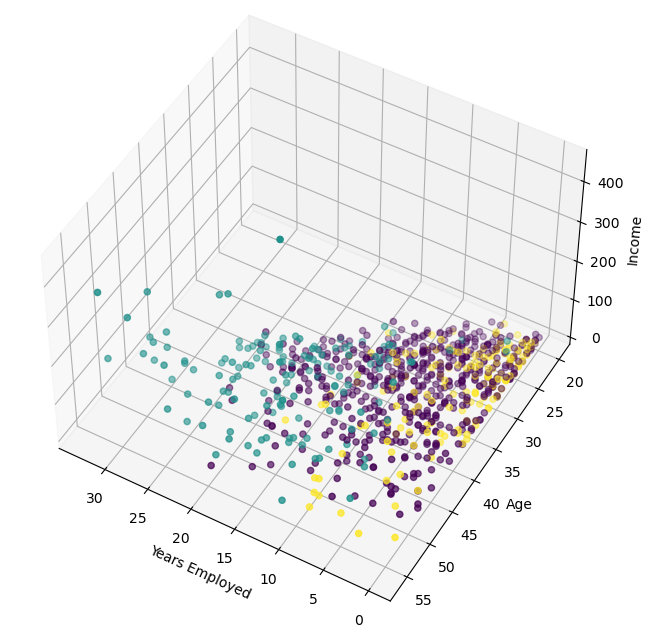

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c= k_means.labels_.astype(float))